# Categorical Variables

## One-Hot-Encoding (Dummy Variables)

There are two ways to convert your data to a one-hot encoding of categorical variables, using either *pandas* or *scikit-learn*

In [9]:
import pandas as pd

data = pd.read_csv('/home/garvit/Datasets/adult.data', header=None, index_col=False, 
                  names=['age', 'workclass', 'fnlwgt', 'education', 'education-num',
                        'marital-status', 'occupation', 'relationship', 'race', 'gender',
                        'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
                        'income'])
data = data[['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income']]

In [11]:
data.head()

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


#### Checking string-encoded categorical data


In [12]:
data['gender'].value_counts()

 Male      21790
 Female    10771
Name: gender, dtype: int64

In [13]:
data_dummies = pd.get_dummies(data)

# Univariate Nonlinear Transformations

We just saw that adding squared or cubed features can help linear models for regression. There are other transformations that often prove useful for transforming certain
features: in particular, applying mathematical functions like *log*, *exp*, or *sin*. While
tree-based models only care about the ordering of the features, linear models and
neural networks are very tied to the scale and distribution of each feature, and if there
is a nonlinear relation between the feature and the target, that becomes hard to model
—particularly in regression. The functions log and exp can help by adjusting the rel‐
ative scales in the data so that they can be captured better by a linear model or neural
network.

# Automatic Feature Selection

## **Univariate Statistics**

In univariate statistics, we compute whether there is a statistically significant relationship between each feature and the target. Then the features that are related with the
highest confidence are selected. In the case of classification, this is also known as
analysis of variance (ANOVA). A key property of these tests is that they are univariate, meaning that they only consider each feature individually. Consequently, a feature will be discarded if it is only informative when combined with another feature.

## **Model-Based Feature Selection**

In [1]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

import matplotlib.pyplot as plt
import numpy as np

In [3]:
cancer = load_breast_cancer()

# get deterministic random numbers
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))
# add noise features to the data
# the first 30 features are from the dataset, the next 50 are noise
X_w_noise = np.hstack([cancer.data, noise])


X_train, X_test, y_train, y_test = train_test_split(X_w_noise, cancer.target, random_state=0, test_size=.5)

In [5]:
select = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42), threshold="median")

In [6]:
select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_l1.shape: {}".format(X_train_l1.shape))

X_train.shape: (284, 80)
X_train_l1.shape: (284, 40)


Text(0.5, 0, 'Sample index')

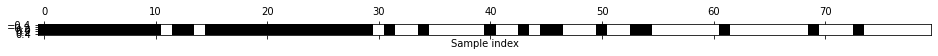

In [7]:
mask = select.get_support()
# visualize the mask -- black is True, white is False
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")
# plt.show()

In [28]:
from sklearn.linear_model import LogisticRegression

X_test_l1 = select.transform(X_test)
score = LogisticRegression().fit(X_train_l1, y_train).score(X_test_l1, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.930


/home/garvit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## **Iterative Feature Selection**

In univariate testing we used no model, while in model-based selection we used a single model to select features. In iterative feature selection, a series of models are built,
with varying numbers of features.

In [2]:
from sklearn.feature_selection import RFE # Recursive Feature Elimination
select = RFE(RandomForestClassifier(n_estimators=100, random_state=42),
n_features_to_select=40)
select.fit(X_train, y_train)
# visualize the selected features:
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")

NameError: name 'X_train' is not defined

In [31]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_boston

boston = load_boston()
X, y = boston.data, boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21